In [13]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [14]:
files = [f'unet_alpha_025_gamma_{gamma}.pkl' for gamma in [1,2,3,4]]
val_loss = {}
max_length = -1
for i,file in enumerate(files):
    with open(file, 'rb') as f:
        data = pickle.load(f)
        val_loss[i+1] = (data['val_loss'],len(data['val_loss']))
        if max_length < len(val_loss[i+1][0]):
            max_length = len(val_loss[i+1][0])

In [15]:
max_length

10

In [16]:
for item in val_loss:
    x = len(val_loss.get(item)[0])
    print(x)
    if len(val_loss.get(item)[0]) < max_length:
        for i in range(7):
            val_loss[item][0].append(val_loss[item][0][-1])
            if len(val_loss.get(item)[0]) == max_length:
                print(len(val_loss.get(item)[0]), max_length)
                break

10
10
9
10 10
10


In [17]:
for item in val_loss:
    print(len(val_loss.get(item)[0]))

10
10
10
10


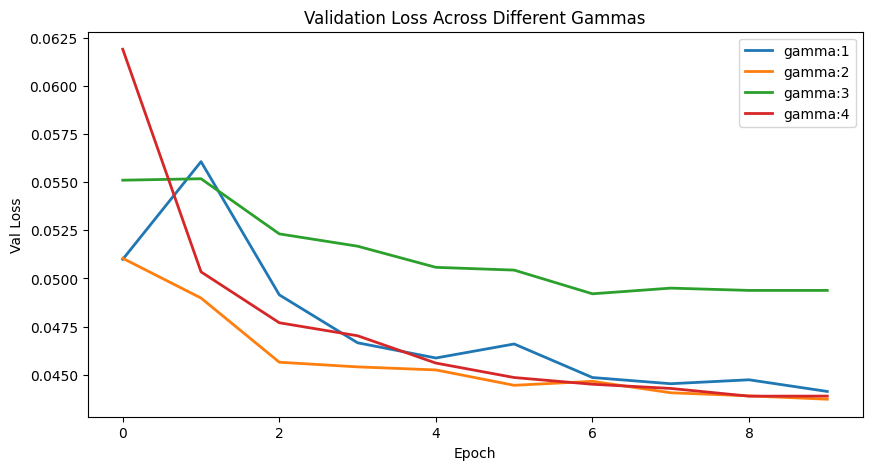

In [18]:
plt.figure(figsize=(10, 5))  # Adjust figure size for clarity

for item in val_loss:
    lst, length = val_loss.get(item)
    sns.lineplot(x=np.arange(max_length),y=np.array(lst)/length, label=f'gamma:{item}',linewidth=2)

plt.xlabel("Epoch")
plt.ylabel("Val Loss")
plt.title("Validation Loss Across Different Gammas")
plt.show()

In [21]:
last_vals = []
for gamma in val_loss:
    print(gamma, val_loss.get(gamma)[0][-1])
    last_vals.append(val_loss.get(gamma)[0][-1])
print(np.argmin(last_vals) + 1)

1 0.4412840008735657
2 0.4372457265853882
3 0.44440069794654846
4 0.4388667643070221
2


In [28]:
file = files[np.argmin(last_vals)]
with open(file, 'rb') as f:
     data = pickle.load(f)

In [33]:
results  = {}
for key in data:
    new_key = '_'.join(key.split('_')[:2])
    results[new_key] = np.mean(data.get(key))

results

{'loss': 0.4423826992511749,
 'precision_2': 0.5117347717285157,
 'recall_2': 0.26909085251390935,
 'IoU': 0.21793862618505955,
 'val_loss': 0.45711226761341095,
 'val_precision': 0.28411961467936636,
 'val_recall': 0.29653205871582033,
 'val_IoU': 0.1487253868021071}

In [35]:
def calculateF1(precision, recall):
    return 2*precision*recall/(precision+recall)

calculateF1(results['precision_2'],results['recall_2'])

0.3527116470314095

In [36]:
calculateF1(results['val_precision'],results['val_recall'])

0.2901931678584102